In [1]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import keras.utils as image


def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Load the background spectrogram images, add them to the list named `x`, and label them with 0s.

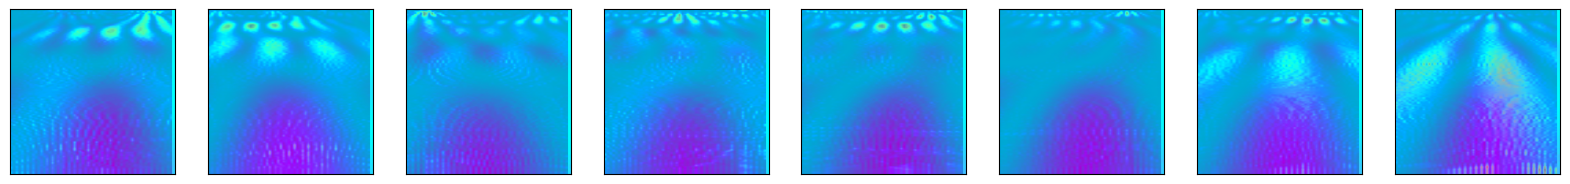

In [3]:
images, labels = load_images_from_path('/kaggle/input/without-denoised-volume/spectrogram_images_with_volume_without_denoised/Down', 0)
show_images(images)
    
x += images
y += labels

Load the chainsaw spectrogram images, add them to the list named `x`, and label them with 1s.

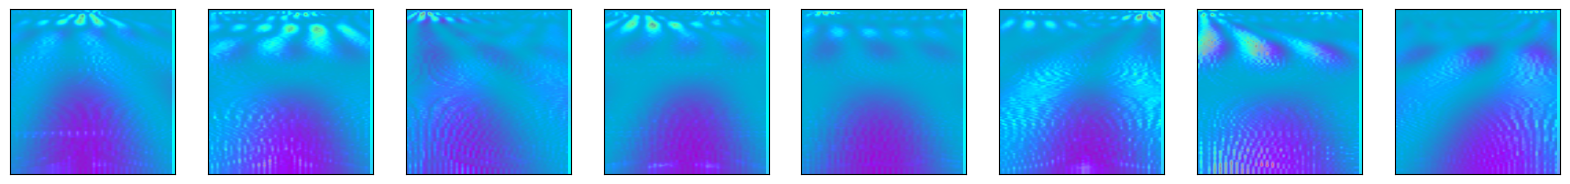

In [5]:
images, labels = load_images_from_path('/kaggle/input/without-denoised-volume/spectrogram_images_with_volume_without_denoised/Up', 1)
show_images(images)
    
x += images
y += labels

Split the images and labels into two datasets — one for training, and one for testing. Then divide the pixel values by 255 and one-hot-encode the labels using Keras's [to_categorical](https://keras.io/api/utils/python_utils/#to_categorical-function) function.

In [6]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pickle
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

## Build and train a CNN

State-of-the-art image classification typically isn't done with traditional neural networks. Rather, it is performed with convolutional neural networks that use [convolution layers](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/) to extract features from images and [pooling layers](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/) to downsize images so features can be detected at various resolutions. The next task is to build a CNN containing a series of convolution and pooling layers for feature extraction, a pair of fully connected layers for classification, and a `softmax` layer that outputs probabilities for each class, and to train it with spectrogram images and labels. Start by defining the CNN.

In [ ]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Flatten, Dense

# # model = Sequential()
# # model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
# # model.add(MaxPooling2D(2, 2))
# # model.add(Conv2D(128, (3, 3), activation='relu'))
# # model.add(MaxPooling2D(2, 2))
# # model.add(Conv2D(128, (3, 3), activation='relu'))
# # model.add(MaxPooling2D(2, 2))
# # model.add(Conv2D(128, (3, 3), activation='relu'))
# # model.add(MaxPooling2D(2, 2))
# # model.add(Flatten())
# # model.add(Dense(1024, activation='relu'))
# # model.add(Dense(4, activation='softmax'))
# # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# # model.summary()

# model = Sequential()
# model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224,224,3)))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.25))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Flatten())
# model.add(Dense(units = 512 , activation = 'relu'))
# model.add(Dropout(0.25))
# model.add(Dense(units = 2 , activation = 'softmax'))
# model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
# model.summary()

Train the CNN and save the `history` object returned by `fit` in a local variable.

In [ ]:
# hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Plot the training and validation accuracy.

In [ ]:
# acc = hist.history['accuracy']
# val_acc = hist.history['val_accuracy']
# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, '-', label='Training Accuracy')
# plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.plot()

The accuracy is decent given that the network was trained with just 280 images, but it might be possible to achieve higher accuracy by employing transfer learning.

## Use transfer learning to improve accuracy

[Transfer learning](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a) is a powerful technique that allows sophisticated CNNs trained by Google, Microsoft, and others on GPUs to be repurposed and used to solve domain-specific problems. Many pretrained CNNs are available in the public domain, and several are included with Keras. Let's use [`MobileNetV2`](https://keras.io/api/applications/mobilenet/), a pretrained CNN from Google that is optimized for mobile devices, to extract features from spectrogram images.

> `MobileNetV2` requires less processing power and has a smaller memory footprint than CNNs such as `ResNet50V2`. That's why it is ideal for mobile devices. You can learn more about it in the [Google AI blog](https://ai.googleblog.com/2018/04/mobilenetv2-next-generation-of-on.html).

Start by calling Keras's [MobileNetV2](https://keras.io/api/applications/mobilenet/) function to instantiate `MobileNetV2` without the classification layers. Use the [preprocess_input](https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet/preprocess_input) function for `MobileNet` networks to preprocess the training and testing images. Then run both datasets through `MobileNetV2` to extract features.

In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

local_weights_file = '/kaggle/input/model-1/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5'

# base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model = MobileNetV2(weights=local_weights_file, include_top=False, input_shape=(224, 224, 3))


x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm) 
test_features = base_model.predict(x_test_norm)

90/90 [==============================] - 2s 26ms/step


Define a neural network to classify features extracted by `MobileNetV2`.

In [9]:
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model = Sequential()
# model.add(Flatten(input_shape=train_features.shape[1:]))
# model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
# model.add(Dense(2, activation='softmax'))
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Train the network with features extracted by `MobileNetV2`.

In [10]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
668/668 [==============================] - 11s 14ms/step - loss: 2.6276 - accuracy: 0.5619 - val_loss: 0.6520 - val_accuracy: 0.6239
Epoch 2/10
668/668 [==============================] - 7s 11ms/step - loss: 0.6384 - accuracy: 0.6388 - val_loss: 0.6589 - val_accuracy: 0.6145
Epoch 3/10
668/668 [==============================] - 7s 11ms/step - loss: 0.6029 - accuracy: 0.6679 - val_loss: 0.6510 - val_accuracy: 0.6333
Epoch 4/10
668/668 [==============================] - 7s 11ms/step - loss: 0.5505 - accuracy: 0.7151 - val_loss: 0.6148 - val_accuracy: 0.6791
Epoch 5/10
668/668 [==============================] - 7s 11ms/step - loss: 0.5071 - accuracy: 0.7501 - val_loss: 0.6000 - val_accuracy: 0.6858
Epoch 6/10
668/668 [==============================] - 7s 11ms/step - loss: 0.4364 - accuracy: 0.7913 - val_loss: 0.6773 - val_accuracy: 0.6910
Epoch 7/10
668/668 [==============================] - 7s 11ms/step - loss: 0.3635 - accuracy: 0.8366 - val_loss: 0.6384 - val_accuracy: 0.727

Plot the training and validation accuracy.

[]

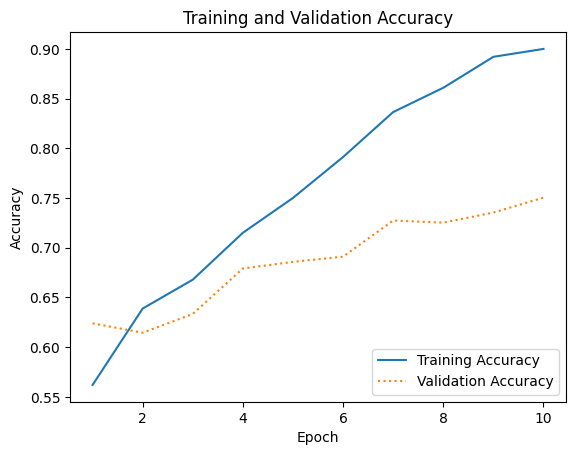

In [11]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping

# Assuming train_features, train_labels, val_features, and val_labels are your training and validation data
# Make sure to adjust input_shape based on your data

model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # Add another dropout layer
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Assuming you have one-hot encoded labels for your classification task
# If not, use sparse_categorical_crossentropy as the loss and adjust labels accordingly
# history = model.fit(
#     train_features, train_labels,
#     epochs=50,
#     batch_size=32,
#     validation_data=(val_features, val_labels),
#     callbacks=[early_stopping]
# )


hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10, callbacks=[early_stopping])

Run the test images through the network and use a confusion matrix to assess the results.

90/90 [==============================] - 1s 5ms/step


Text(109.44999999999997, 0.5, 'Actual label')

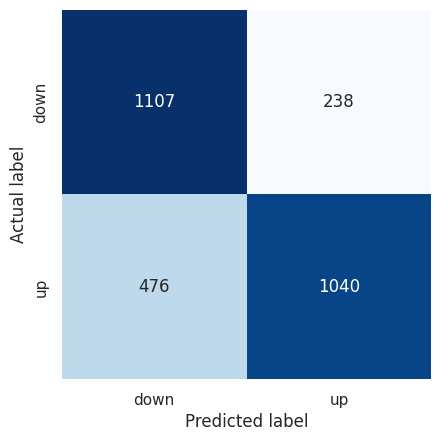

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['down', 'up']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_predicted contains probabilities, extract class labels
y_pred_classes = y_predicted.argmax(axis=1)
y_true = y_test_encoded.argmax(axis=1)

# Calculate Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Calculate Precision
precision = precision_score(y_true, y_pred_classes, average='macro')

# Calculate Recall
recall = recall_score(y_true, y_pred_classes, average='macro')

# Calculate F1-score
f1 = f1_score(y_true, y_pred_classes, average='macro')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 75.04%
Precision: 0.76
Recall: 0.75
F1 Score: 0.75
